In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers, models , Input
from tensorflow.keras.models import Model


from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, LeakyReLU
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#path = ''

In [2]:
xdata = np.genfromtxt('imagesr.csv', delimiter=',')
ydata = np.genfromtxt('labelsr.csv', delimiter = ',')



In [3]:

xdata = np.reshape(xdata, (3000, 32,32, 3))
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.1, random_state=23)

xtrain =  xtrain/255.
xtest = xtest/255.


### Model Creation 
Building Convolutional Neural Network for image Classification

In [29]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
                  
                  
      layers.Flatten(),
      layers.Dense(12, activation='relu'),
      layers.Dense(1, activation='sigmoid' )
                  
])

In [37]:
cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
# fit = cnn.fit(xtrain,ytrain, epochs=10)

fit = cnn.fit(xtrain,ytrain,batch_size=2, epochs=3,
                validation_data=(xtest,ytest),
                verbose=2,shuffle=True)

Epoch 1/3
1350/1350 - 14s - loss: 0.1666 - accuracy: 0.9474 - val_loss: 0.5849 - val_accuracy: 0.8300 - 14s/epoch - 10ms/step
Epoch 2/3
1350/1350 - 14s - loss: 0.1568 - accuracy: 0.9463 - val_loss: 0.7547 - val_accuracy: 0.8300 - 14s/epoch - 10ms/step
Epoch 3/3
1350/1350 - 13s - loss: 0.1312 - accuracy: 0.9530 - val_loss: 0.7664 - val_accuracy: 0.8333 - 13s/epoch - 10ms/step


[0.9474074244499207, 0.9462962746620178, 0.9529629349708557]


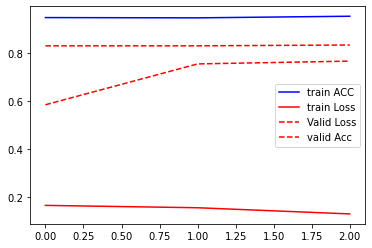

In [67]:
# fig,AX=plt.subplots(1,2,figsize=(12,5.))
# ax=AX[0]

print(fit.history['accuracy'])
plt.plot(fit.history['accuracy'],"b",label="train ACC")
plt.plot(fit.history['loss'],"r",label="train Loss")
plt.plot(fit.history['val_loss'],"r--",label="Valid Loss")
plt.plot(fit.history['val_accuracy'],"r--",label="valid Acc")


ax.set_xlim([3, 5])
ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])


plt.legend()

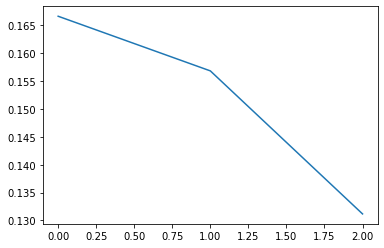

In [61]:
plt.plot(fit.history['loss'])

In [69]:
print(fit.evaluate(xtest, ytest))

AttributeError: 'History' object has no attribute 'evaluate'